In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('/content/sample_data/placement.csv')

In [4]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123,1
1,1,5.9,106,0
2,2,5.3,121,0
3,3,7.4,132,1
4,4,5.8,142,0


In [6]:
df.shape

(100, 4)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    int64  
 3   placement   100 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 3.3 KB


In [8]:
df=df.iloc[:,1:]

In [9]:
df.head()

,cgpa,iq,placement
0,6.8,123,1
1,5.9,106,0
2,5.3,121,0
3,7.4,132,1
4,5.8,142,0


In [10]:
# Steps

# 0. Preprocess + EDA + Feature Selection
# 1. Extract input and output cols
# 2. Scale the values
# 3. Train test split
# 4. Train the model
# 5. Evaluate the model/model selection
# 6. Deploy the model

In [11]:
import matplotlib.pyplot as plt

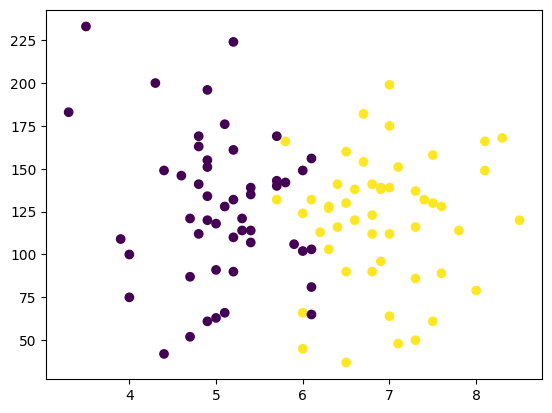

In [12]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [13]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [14]:
X

,cgpa,iq
0,6.8,123
1,5.9,106
2,5.3,121
3,7.4,132
4,5.8,142
...,...,...
95,4.3,200
96,4.4,42
97,6.7,182
98,6.3,103


In [16]:
y

,placement
0,1
1,0
2,0
3,1
4,0
...,...
95,0
96,0
97,1
98,1


In [17]:
y.shape

(100,)

In [18]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)

In [19]:
X_train

,cgpa,iq
21,7.1,151
82,6.5,37
83,7.5,130
17,3.3,183
48,6.6,138
...,...,...
90,7.3,86
8,6.1,156
39,4.6,146
3,7.4,132


In [20]:
y_train

,placement
21,1
82,1
83,1
17,0
48,1
...,...
90,1
8,0
39,0
3,1


In [21]:
X_test

,cgpa,iq
71,6.1,132
11,6.9,138
36,5.7,140
64,7.0,64
25,5.0,91
74,6.7,154
51,4.8,141
89,4.9,151
26,7.0,199
24,4.7,121


In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler = StandardScaler()

In [24]:
X_train = scaler.fit_transform(X_train)

In [25]:
X_train

array([[ 0.94679101,  0.70943029],
       [ 0.42878985, -2.13050523],
       [ 1.29212512,  0.18628427],
       [-2.33388301,  1.50660517],
       [ 0.51512338,  0.38557799],
       [ 0.68779043, -0.81018433],
       [ 0.2561228 ,  0.13646084],
       [ 1.81012628,  0.65960685],
       [-1.38421422,  0.65960685],
       [-0.693546  ,  0.2361077 ],
       [-0.26187837,  1.15784116],
       [-1.38421422, -2.00594665],
       [ 1.37845865, -0.83509605],
       [ 0.2561228 , -0.48633204],
       [-0.693546  ,  2.52798548],
       [ 0.42878985, -0.81018433],
       [-0.52087895, -0.38668518],
       [ 1.11945807,  0.36066627],
       [-0.693546  ,  0.95854744],
       [-0.17554484,  0.48522485],
       [-1.72954832, -0.56106718],
       [-0.52087895,  0.31084284],
       [-0.95254658, -0.06283288],
       [ 0.2561228 ,  0.11154912],
       [-0.00287778, -1.93121151],
       [ 1.5511257 , -0.21230317],
       [-0.52087895,  0.4104897 ],
       [ 0.08345574, -1.43297721],
       [-0.95254658,

In [26]:
X_test = scaler.transform(X_test)

In [27]:
X_test

array([[ 0.08345574,  0.2361077 ],
       [ 0.77412396,  0.38557799],
       [-0.26187837,  0.43540142],
       [ 0.86045749, -1.45788892],
       [-0.86621305, -0.78527262],
       [ 0.6014569 ,  0.78416543],
       [-1.03888011,  0.46031313],
       [-0.95254658,  0.70943029],
       [ 0.86045749,  1.90519261],
       [-1.12521363, -0.03792117]])

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
clf = LogisticRegression()

In [30]:
# model training
clf.fit(X_train,y_train)

LogisticRegression()

In [31]:
y_pred = clf.predict(X_test)

In [32]:
y_test

,placement
71,1
11,1
36,0
64,1
25,0
74,1
51,0
89,0
26,1
24,0


In [33]:
from sklearn.metrics import accuracy_score

In [34]:
accuracy_score(y_test,y_pred)

1.0

In [35]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

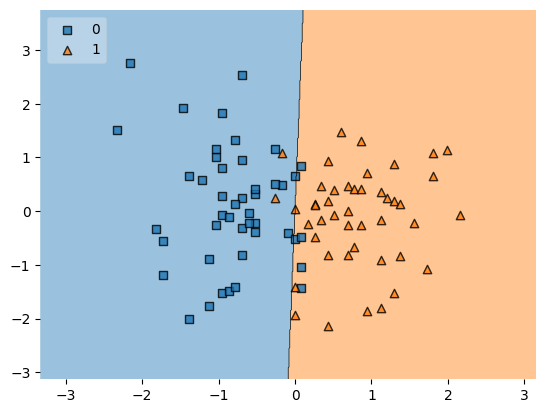

In [36]:
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)

In [39]:
import pickle

In [40]:
pickle.dump(clf,open('model.pkl','wb'))